# ДЗ №2

Сделать логистическую регрессию на известных признаках, получить как можно лучший `score` (использовать регулиризацию, подбор гиперпараметров)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import SGDRegressor, LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
sns.set()

In [2]:
def cross_validation(train, features, target, scoring_metric='roc_auc'):
    cv_results = cross_val_score(LogisticRegression(), train[features], train[target].values.ravel(), cv=5, scoring=scoring_metric)
    
    for i in range(len(cv_results)):
        print(f'Fold #{i+1}: {round(cv_results[i], 5)}')
    score = np.mean(cv_results)
    print( f'Average = {score}')
    
    return score

In [3]:
def train_and_save_model(train, test, features, target, nameFile):
    model = LogisticRegression()
    model.fit(X=train[features], y = train[target].values.ravel())
    test_prediction = model.predict(test[features])
    sample_submission = pd.read_csv('../data/raw/HW#2/sample_submission.csv')
    print(np.unique(test_prediction))
    sample_submission[target] = test_prediction
    #sample_submission[target] = sample_submission[target].clip(0, 1000000000)
    sample_submission.to_csv(f'HW#2_models/{nameFile}.csv', index = False)
    print(model.coef_, model.intercept_)

In [4]:
def normalize(sequences):
    return (sequences - sequences.mean()) / (sequences.max() - sequences.min())

In [5]:
train = pd.read_csv('../data/raw/HW#2/application_train.csv')
test = pd.read_csv('../data/raw/HW#2/application_test.csv')

In [6]:
features = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY']
target = ['TARGET']

In [7]:
train[features].isna().sum()

AMT_INCOME_TOTAL     0
AMT_CREDIT           0
AMT_ANNUITY         12
dtype: int64

In [8]:
test['AMT_ANNUITY'] = test['AMT_ANNUITY'].fillna(train['AMT_ANNUITY'].median())
train['AMT_ANNUITY'] = train['AMT_ANNUITY'].fillna(train['AMT_ANNUITY'].median())

In [9]:
cross_validation(train, features, target)

Fold #1: 0.51412
Fold #2: 0.51266
Fold #3: 0.51327
Fold #4: 0.51337
Fold #5: 0.52029
Average = 0.5147403780345055


0.5147403780345055

In [10]:
train_and_save_model(train, test, features, target, 'model_0')

[0]
[[-7.96800680e-06 -3.04496069e-07 -3.47111582e-05]] [-8.00052607e-09]


### Модель 1

In [11]:
features += ['CODE_GENDER', 'FLAG_OWN_REALTY', 'FLAG_OWN_CAR',
             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_INCOME_TYPE']

In [12]:
features

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'CODE_GENDER',
 'FLAG_OWN_REALTY',
 'FLAG_OWN_CAR',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_INCOME_TYPE']

In [13]:
train[features]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE
0,202500.0,406597.5,24700.5,M,Y,N,Secondary / secondary special,Single / not married,Working
1,270000.0,1293502.5,35698.5,F,N,N,Higher education,Married,State servant
2,67500.0,135000.0,6750.0,M,Y,Y,Secondary / secondary special,Single / not married,Working
3,135000.0,312682.5,29686.5,F,Y,N,Secondary / secondary special,Civil marriage,Working
4,121500.0,513000.0,21865.5,M,Y,N,Secondary / secondary special,Single / not married,Working
...,...,...,...,...,...,...,...,...,...
307506,157500.0,254700.0,27558.0,M,N,N,Secondary / secondary special,Separated,Working
307507,72000.0,269550.0,12001.5,F,Y,N,Secondary / secondary special,Widow,Pensioner
307508,153000.0,677664.0,29979.0,F,Y,N,Higher education,Separated,Working
307509,171000.0,370107.0,20205.0,F,Y,N,Secondary / secondary special,Married,Commercial associate


In [14]:
train['CODE_GENDER'] = train['CODE_GENDER'].replace( { 'M':1,'F':0, 'XNA': 0.5  })
test['CODE_GENDER'] = test['CODE_GENDER'].replace( { 'M':1,'F':0, 'XNA': 0.5  })

In [15]:
train['FLAG_OWN_REALTY'] = train['FLAG_OWN_REALTY'].replace( { 'Y':1,'N':0  })
test['FLAG_OWN_REALTY'] = test['FLAG_OWN_REALTY'].replace( { 'Y':1,'N':0  })

In [16]:
train['FLAG_OWN_CAR'] = train['FLAG_OWN_CAR'].replace( { 'Y':1,'N':0  })
test['FLAG_OWN_CAR'] = test['FLAG_OWN_CAR'].replace( { 'Y':1,'N':0  })

In [17]:
dict_education = {'Secondary / secondary special': 1, 'Higher education': 3,
       'Incomplete higher': 2, 'Lower secondary': 0, 'Academic degree': 4}
train['NAME_EDUCATION_TYPE'] = train['NAME_EDUCATION_TYPE'].replace(dict_education)
test['NAME_EDUCATION_TYPE'] = test['NAME_EDUCATION_TYPE'].replace(dict_education)

In [18]:
dict_family_stat = {'Single / not married': 0, 'Married': 2, 'Civil marriage': 1, 'Widow': 4,
       'Separated': 3, 'Unknown': 0 }
train['NAME_FAMILY_STATUS'] = train['NAME_FAMILY_STATUS'].replace(dict_family_stat)
test['NAME_FAMILY_STATUS'] = test['NAME_FAMILY_STATUS'].replace(dict_family_stat)

In [19]:
dict_income_type = {'Working': 3, 'State servant': 5, 'Commercial associate': 6, 'Pensioner': 7,
       'Unemployed': 0, 'Student': 1, 'Businessman': 4, 'Maternity leave': 2}
train['NAME_INCOME_TYPE'] = train['NAME_INCOME_TYPE'].replace(dict_income_type)
test['NAME_INCOME_TYPE'] = test['NAME_INCOME_TYPE'].replace(dict_income_type)

In [20]:
train[features] = normalize(train[features])

test[features] = normalize(test[features])

In [21]:
train[features]

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,CODE_GENDER,FLAG_OWN_REALTY,FLAG_OWN_CAR,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE
0,0.000288,-0.048047,-0.009391,0.65835,0.306327,-0.340108,-0.127377,-0.444131,-0.222806
1,0.000865,0.173402,0.033501,-0.34165,-0.693673,-0.340108,0.372623,0.055869,0.062908
2,-0.000866,-0.115862,-0.079398,0.65835,0.306327,0.659892,-0.127377,-0.444131,-0.222806
3,-0.000289,-0.071497,0.010054,-0.34165,0.306327,-0.340108,-0.127377,-0.194131,-0.222806
4,-0.000404,-0.021480,-0.020448,0.65835,0.306327,-0.340108,-0.127377,-0.444131,-0.222806
...,...,...,...,...,...,...,...,...,...
307506,-0.000097,-0.085974,0.001753,0.65835,-0.693673,-0.340108,-0.127377,0.305869,-0.222806
307507,-0.000828,-0.082266,-0.058917,-0.34165,0.306327,-0.340108,-0.127377,0.555869,0.348622
307508,-0.000135,0.019635,0.011195,-0.34165,0.306327,-0.340108,0.372623,0.305869,-0.222806
307509,0.000019,-0.057158,-0.026924,-0.34165,0.306327,-0.340108,-0.127377,0.055869,0.205765


In [22]:
cross_validation(train, features, target)

Fold #1: 0.61561
Fold #2: 0.61535
Fold #3: 0.60846
Fold #4: 0.60801
Fold #5: 0.61689
Average = 0.6128644231227869


0.6128644231227869

In [23]:
train_and_save_model(train, test, features, target, 'model_1')

[0]
[[ 0.01817766 -1.45098132  1.70378666  0.43006653 -0.01686645 -0.3235684
  -0.98136284 -0.40407436 -0.79993003]] [-2.50197938]


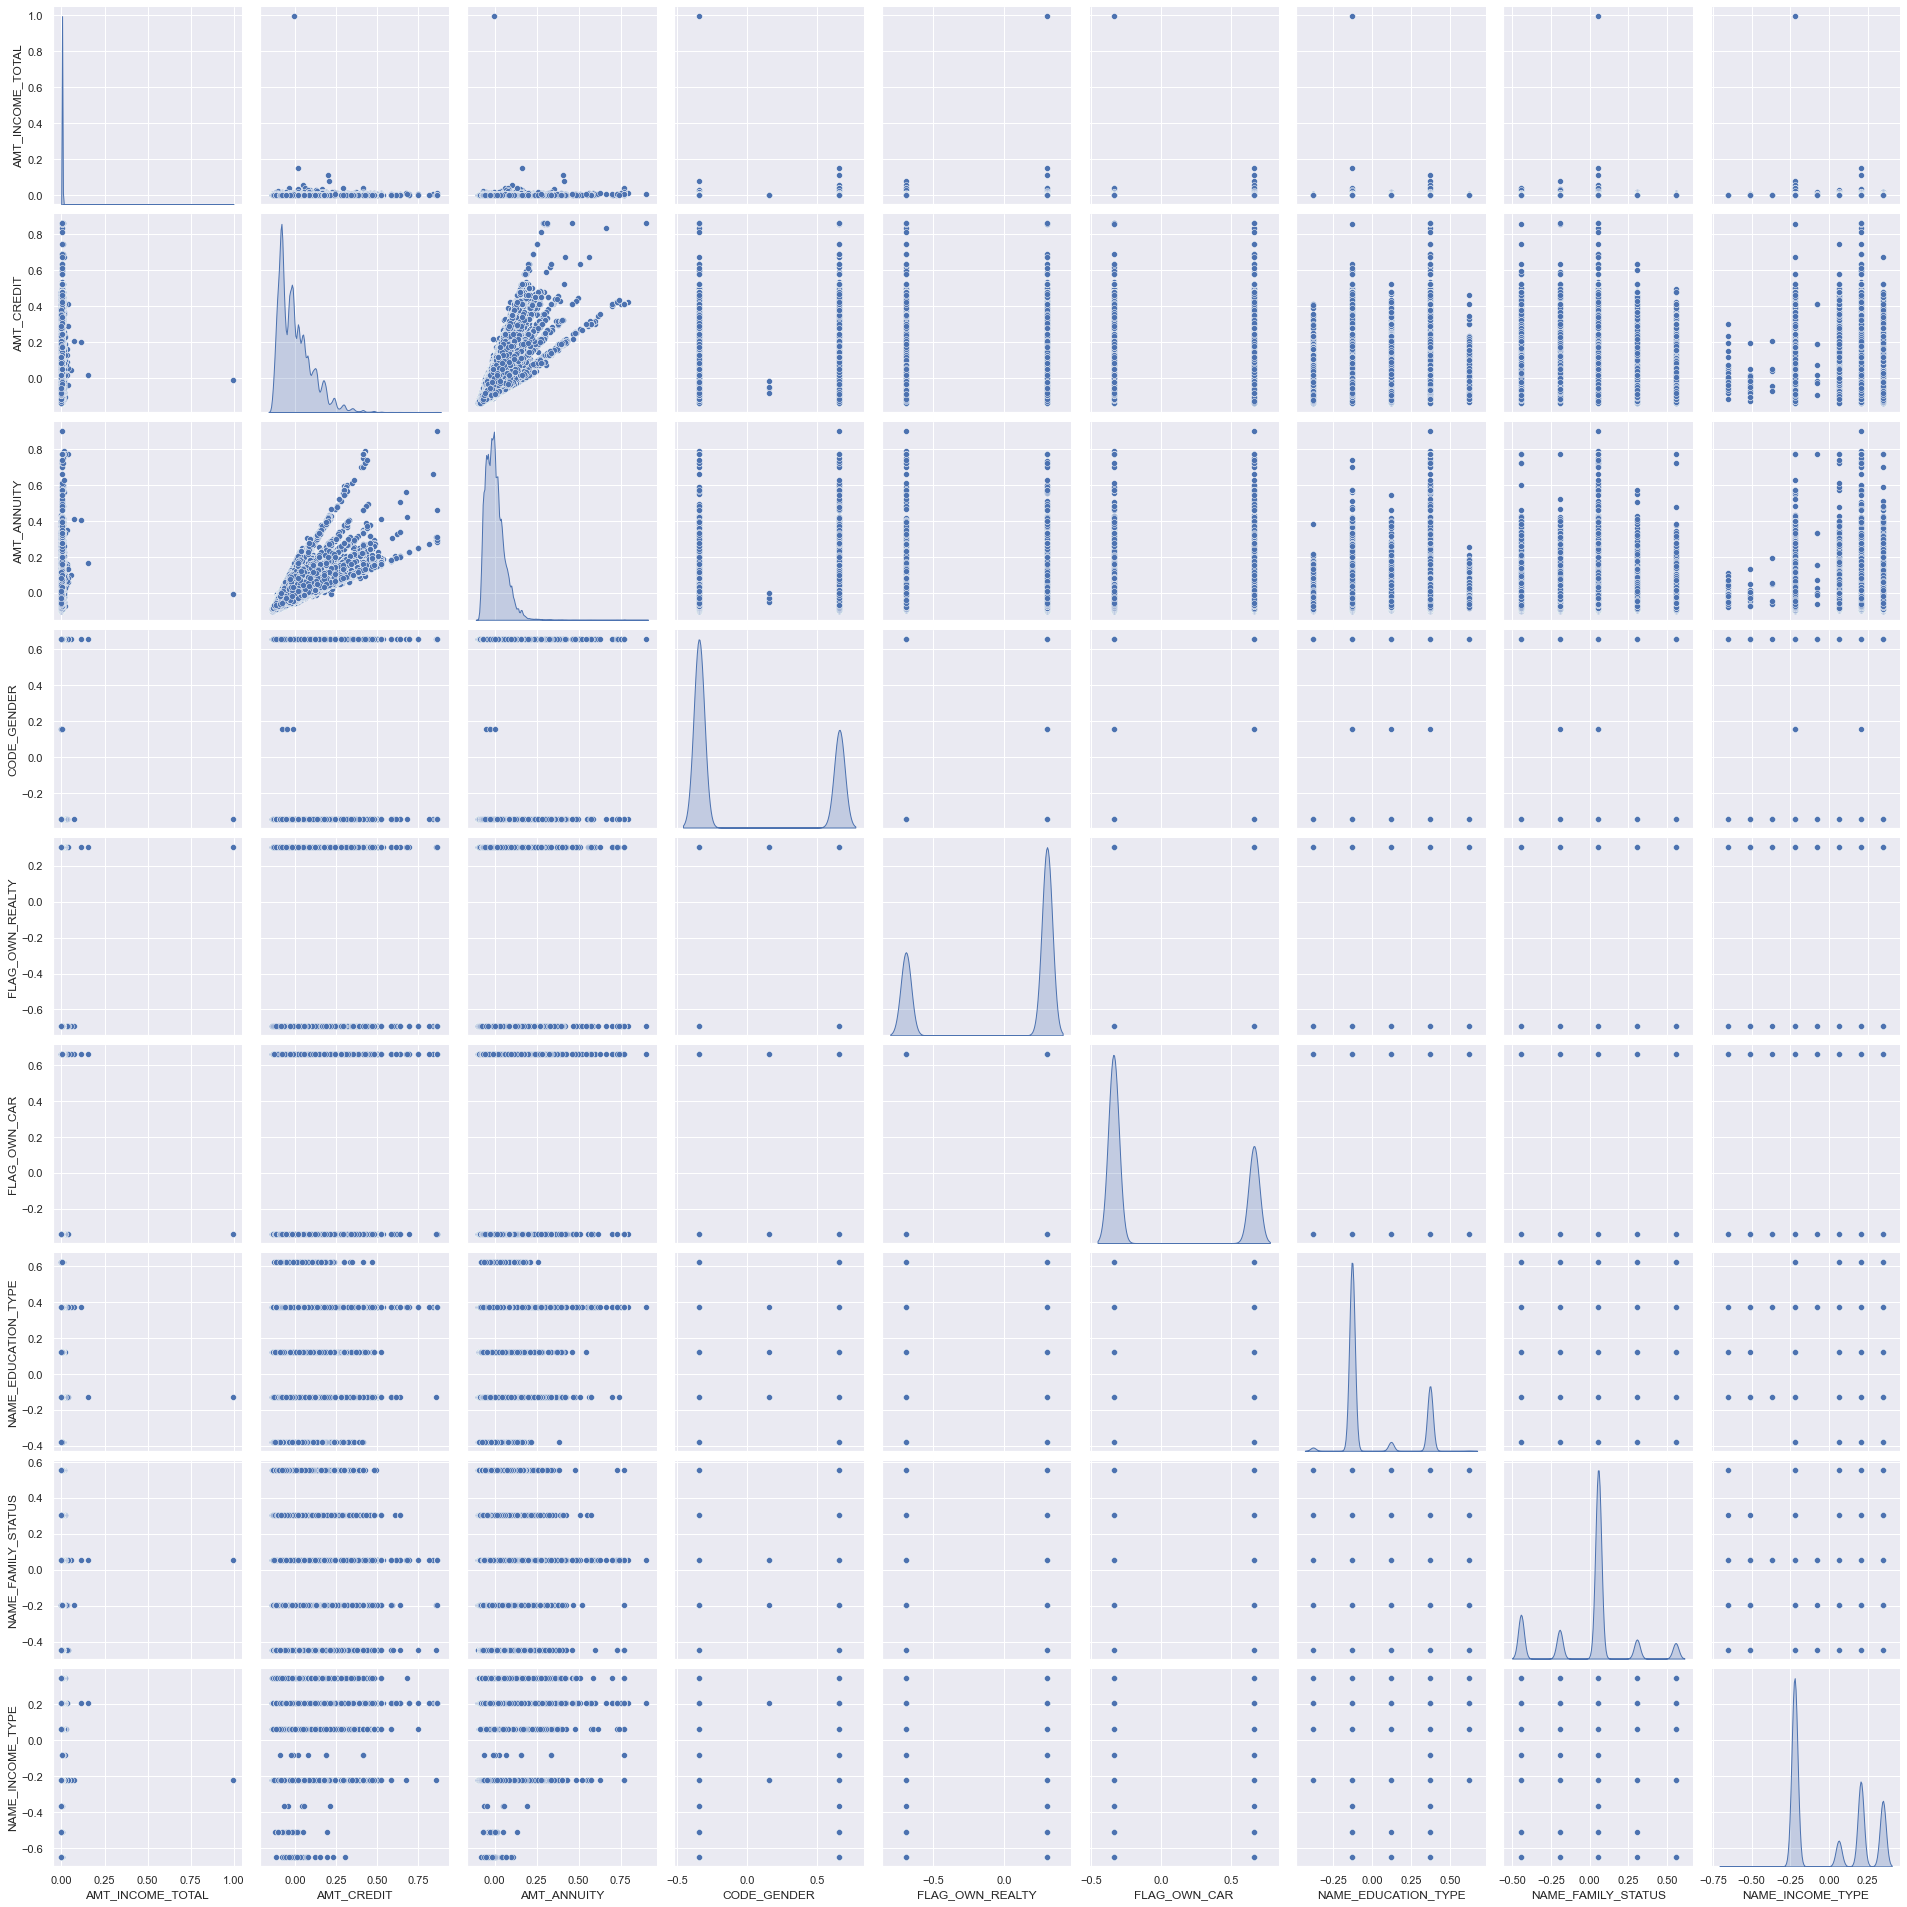

In [24]:
sns.pairplot(train[features], height = 3, diag_kind = 'kde');